# Clustering

### Dimensionality Reduction & LSA

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import json as js
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
# Read report
data = pd.read_csv("02-ASRS_DBOnline.csv",index_col=0).reset_index()
data = data.dropna(subset=['Place.3','Place.5','Report 1.2']).reset_index()[1:]
new_report = pd.read_csv("02-report.csv", index_col=0)
new_report.head()

,Summary
0,nation transport safeti board determin that pr...
1,nation transport safeti board determin that pr...
2,ntsb determin that probabl caus thi accid wa p...
3,ntsb determin that probabl caus thi accid wa f...
4,nation transport safeti board determin that pr...


In [3]:
# Word reference
word_reference = pd.read_csv("02-ASRS-word-reference.csv", index_col=0)
def lookup(word):
    for i in range(len(word_reference)):
        if word_reference['after'][i] == word:
            print(word_reference['before'][i])
            break

In [4]:
lookup('arpt')

ARPTS


In [5]:
# Tfid Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(new_report['Summary'])
print(dtm.shape)
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
terms = vectorizer.get_feature_names()

(1196, 2379)


In [6]:
# Decide n_components
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(n_components=100, algorithm="randomized")
svd_fit = svd.fit_transform(centered_dtm)
svd_norm = Normalizer().fit_transform(svd_fit)

vt = svd.components_
dfnorm = pd.DataFrame(svd_norm)

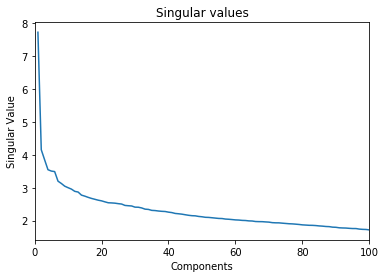

In [7]:
s = svd.singular_values_
plt.xlim([0,100])
plt.plot(range(1,len(s)+1),s)
plt.title('Singular values')
plt.ylabel('Singular Value')
plt.xlabel('Components')

### decide n_components

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale

In [67]:
# Tfid Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(new_report['Summary'])
print(dtm.shape)
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
terms = vectorizer.get_feature_names()

(1196, 2379)


In [69]:
svd = TruncatedSVD(n_components=5, algorithm="randomized")
svd_fit = svd.fit_transform(centered_dtm)
svd_norm = Normalizer().fit_transform(svd_fit)

vt = svd.components_
dfnorm = pd.DataFrame(svd_norm)

In [78]:
order_components = vt.argsort()[:, ::-1]
components = []
for i in range(vt.shape[0]):
    label = [terms[ind] for ind in order_components[i, :5]]
    components.append(label)
dfnorm.columns = components
dfnorm.head()

,ft,acft,tfc,tcasii,apch
,tcasii,ft,ra,clb,tfc
,approach,crew,descent,visual,captain
,acr,sector,radar,issu,ctlr
,failur,flight,pilot,engin,aviat
0,-0.715418,0.234395,0.507542,0.296234,0.296450
1,-0.730629,-0.015913,-0.252078,-0.402283,-0.490463
2,-0.988305,-0.048161,0.126737,-0.033796,-0.061065
3,-0.870257,-0.009522,-0.213229,0.098409,0.432909
4,-0.871423,-0.125101,-0.466808,-0.011973,0.083182


In [110]:
components

[['ft', 'acft', 'tfc', 'tcasii', 'apch'],
 ['tcasii', 'ft', 'ra', 'clb', 'tfc'],
 ['approach', 'crew', 'descent', 'visual', 'captain'],
 ['acr', 'sector', 'radar', 'issu', 'ctlr'],
 ['failur', 'flight', 'pilot', 'engin', 'aviat']]

Full forms of the above abbreviations:
1. aircaft, error, standard, system, separation, between, Less Than Standard Separation
2. control, boston air route traffic control center, experience, operator, at, separation, standard, feet
3. Traffic Alert and Collision Avoidance, to, alert, aircaft, Resolution Advisory, Less Than Standard Separation, assign, descdent
4. runways, on, aircraft, approach, experience, Less Than Standard Separation, operator, error
5. Resolution Advisory, Traffic Alert and Collision Avoidance, report, crew, aircraft, approach runway, control

1. Near mid air collision, , , Pattern
2. aircraft, error, standard, Near mid air collision,
3. separate, 
4.
5.

In [112]:
dfloc = pd.DataFrame(scale(data[['Place.3', 'Place.5']]), columns=['lat', 'dis'])
df_features = dfloc.join(dfnorm)
print(df_features.shape)
df_features.head()

(571, 7)


/Users/aslstem/anaconda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 5 on the right)
  warnings.warn(msg, UserWarning)


,lat,dis,"(ft, tcasii, approach, acr, failur)","(acft, ft, crew, sector, flight)","(tfc, ra, descent, radar, pilot)","(tcasii, clb, visual, issu, engin)","(apch, tfc, captain, ctlr, aviat)"
0,-0.214551,-0.640337,-0.715418,0.234395,0.507542,0.296234,0.296450
1,0.237947,-0.373952,-0.730629,-0.015913,-0.252078,-0.402283,-0.490463
2,-0.458203,-0.866764,-0.988305,-0.048161,0.126737,-0.033796,-0.061065
3,-0.005706,-0.507144,-0.870257,-0.009522,-0.213229,0.098409,0.432909
4,-0.458203,-0.733571,-0.871423,-0.125101,-0.466808,-0.011973,0.083182


# Analysis

1. midair collision sma has pattern / less than standard separation system error oppuacied
2. aircarrier error standard midair collision / in separate standard aircraft
3. nmac operator 